In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_final = pd.read_csv('df_final.csv', delimiter=',', thousands='.', decimal=',')

In [4]:
df_final

,year,region,province,population,acc with victims,total injuried,mortals,hosp injuries,minor injuries,gas_stations,...,free_motorways_provincial,multiple_road_CCAA,multiple_road_State,multiple_road_provincial,single_road_CCAA,single_road_State,single_road_provincial,toll_motorways_CCAA,toll_motorways_State,toll_motorways_provincial
0,2013,País Vasco,Álava,202969,906,1216,17,86,1113,56,...,9227.0,NaN,0,1196.0,NaN,0,128398.0,NaN,6089,1423.0
1,2013,Castilla-La Mancha,Albacete,246555,481,680,19,87,574,144,...,0.0,0.0,0,0.0,159685.0,4204,140879.0,0.0,0,0.0
2,2013,C. Valenciana,Alicante,1194721,2465,3530,42,341,3147,344,...,0.0,584.0,6529,1608.0,9069.0,20849,99638.0,0.0,15946,0.0
3,2013,Andalucía,Almería,448850,788,1321,30,121,1170,162,...,0.0,232.0,112,0.0,71376.0,14006,117288.0,0.0,2819,0.0
4,2013,Castilla y León,Ávila,99333,378,558,19,71,468,55,...,0.0,201.0,324,0.0,98673.0,34639,10650.0,0.0,374,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,2022,País Vasco,Vizcaya,680078,1883,2456,21,150,2285,127,...,10451.0,NaN,0,3962.0,NaN,0,103687.0,NaN,0,7233.0
516,2022,Castilla y León,Zamora,92999,202,290,21,46,223,84,...,0.0,0.0,1569,0.0,113691.0,42294,15710.0,0.0,0,0.0
517,2022,Aragón,Zaragoza,576511,1589,2065,45,210,1810,249,...,0.0,941.0,3611,315.0,204336.0,47143,101675.0,528.0,5491,0.0
518,2022,Ceuta,Ceuta,51147,257,366,1,10,355,9,...,NaN,0.0,104,NaN,2102.0,1519,NaN,0.0,0,NaN


In [6]:
# Crear el dataframe df_final_region con las columnas especificadas
df_final_region = df_final[['year', 'region', 'population', 'acc with victims', 'total injuried', 'mortals', 'hosp injuries', 'minor injuries', 'gas_stations']].copy()

# Sumar las carreteras por tipo
df_final_region['total_state_roads'] = df_final[['free_motorways_State', 'multiple_road_State', 'single_road_State', 'toll_motorways_State']].sum(axis=1)
df_final_region['total_ccaa_roads'] = df_final[['free_motorways_CCAA', 'multiple_road_CCAA', 'single_road_CCAA', 'toll_motorways_CCAA']].sum(axis=1)
df_final_region['total_provincial_roads'] = df_final[['free_motorways_provincial', 'multiple_road_provincial', 'single_road_provincial', 'toll_motorways_provincial']].sum(axis=1)

df_final_region

,year,region,population,acc with victims,total injuried,mortals,hosp injuries,minor injuries,gas_stations,total_state_roads,total_ccaa_roads,total_provincial_roads
0,2013,País Vasco,202969,906,1216,17,86,1113,56,6089,0.0,140244.0
1,2013,Castilla-La Mancha,246555,481,680,19,87,574,144,7013,159685.0,140879.0
2,2013,C. Valenciana,1194721,2465,3530,42,341,3147,344,45683,11202.0,101246.0
3,2013,Andalucía,448850,788,1321,30,121,1170,162,18972,81765.0,117288.0
4,2013,Castilla y León,99333,378,558,19,71,468,55,44034,98874.0,10650.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,2022,País Vasco,680078,1883,2456,21,150,2285,127,0,0.0,125333.0
516,2022,Castilla y León,92999,202,290,21,46,223,84,77350,113691.0,15710.0
517,2022,Aragón,576511,1589,2065,45,210,1810,249,96570,205805.0,101990.0
518,2022,Ceuta,51147,257,366,1,10,355,9,1623,2102.0,0.0


In [7]:
df_final_region['acc_victims_rate_per_100k'] = (df_final_region['acc with victims'] / df_final_region['population']) * 100000
df_final_region

,year,region,population,acc with victims,total injuried,mortals,hosp injuries,minor injuries,gas_stations,total_state_roads,total_ccaa_roads,total_provincial_roads,acc_victims_rate_per_100k
0,2013,País Vasco,202969,906,1216,17,86,1113,56,6089,0.0,140244.0,446.373584
1,2013,Castilla-La Mancha,246555,481,680,19,87,574,144,7013,159685.0,140879.0,195.088317
2,2013,C. Valenciana,1194721,2465,3530,42,341,3147,344,45683,11202.0,101246.0,206.324322
3,2013,Andalucía,448850,788,1321,30,121,1170,162,18972,81765.0,117288.0,175.559764
4,2013,Castilla y León,99333,378,558,19,71,468,55,44034,98874.0,10650.0,380.538190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,2022,País Vasco,680078,1883,2456,21,150,2285,127,0,0.0,125333.0,276.880005
516,2022,Castilla y León,92999,202,290,21,46,223,84,77350,113691.0,15710.0,217.206637
517,2022,Aragón,576511,1589,2065,45,210,1810,249,96570,205805.0,101990.0,275.623535
518,2022,Ceuta,51147,257,366,1,10,355,9,1623,2102.0,0.0,502.473263


In [8]:
# Crear las columnas de tasa de accidentes con víctimas por cada 100 kilómetros de cada tipo de carretera
df_final_region['acc_victims_rate_per_100km_state'] = (df_final_region['acc with victims'] / df_final_region['total_state_roads']) * 100
df_final_region['acc_victims_rate_per_100km_ccaa'] = (df_final_region['acc with victims'] / df_final_region['total_ccaa_roads']) * 100
df_final_region['acc_victims_rate_per_100km_provincial'] = (df_final_region['acc with victims'] / df_final_region['total_provincial_roads']) * 100

df_final_region

,year,region,population,acc with victims,total injuried,mortals,hosp injuries,minor injuries,gas_stations,total_state_roads,total_ccaa_roads,total_provincial_roads,acc_victims_rate_per_100k,acc_victims_rate_per_100km_state,acc_victims_rate_per_100km_ccaa,acc_victims_rate_per_100km_provincial
0,2013,País Vasco,202969,906,1216,17,86,1113,56,6089,0.0,140244.0,446.373584,14.879291,inf,0.646017
1,2013,Castilla-La Mancha,246555,481,680,19,87,574,144,7013,159685.0,140879.0,195.088317,6.858691,0.301218,0.341428
2,2013,C. Valenciana,1194721,2465,3530,42,341,3147,344,45683,11202.0,101246.0,206.324322,5.395880,22.004999,2.434664
3,2013,Andalucía,448850,788,1321,30,121,1170,162,18972,81765.0,117288.0,175.559764,4.153489,0.963738,0.671850
4,2013,Castilla y León,99333,378,558,19,71,468,55,44034,98874.0,10650.0,380.538190,0.858428,0.382305,3.549296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,2022,País Vasco,680078,1883,2456,21,150,2285,127,0,0.0,125333.0,276.880005,inf,inf,1.502398
516,2022,Castilla y León,92999,202,290,21,46,223,84,77350,113691.0,15710.0,217.206637,0.261151,0.177675,1.285805
517,2022,Aragón,576511,1589,2065,45,210,1810,249,96570,205805.0,101990.0,275.623535,1.645439,0.772090,1.557996
518,2022,Ceuta,51147,257,366,1,10,355,9,1623,2102.0,0.0,502.473263,15.834874,12.226451,inf


In [9]:
df_final_region['roads_km'] = (
    df_final_region['total_state_roads'] +
    df_final_region['total_ccaa_roads'] +
    df_final_region['total_provincial_roads']
)

df_final_region

,year,region,population,acc with victims,total injuried,mortals,hosp injuries,minor injuries,gas_stations,total_state_roads,total_ccaa_roads,total_provincial_roads,acc_victims_rate_per_100k,acc_victims_rate_per_100km_state,acc_victims_rate_per_100km_ccaa,acc_victims_rate_per_100km_provincial,roads_km
0,2013,País Vasco,202969,906,1216,17,86,1113,56,6089,0.0,140244.0,446.373584,14.879291,inf,0.646017,146333.0
1,2013,Castilla-La Mancha,246555,481,680,19,87,574,144,7013,159685.0,140879.0,195.088317,6.858691,0.301218,0.341428,307577.0
2,2013,C. Valenciana,1194721,2465,3530,42,341,3147,344,45683,11202.0,101246.0,206.324322,5.395880,22.004999,2.434664,158131.0
3,2013,Andalucía,448850,788,1321,30,121,1170,162,18972,81765.0,117288.0,175.559764,4.153489,0.963738,0.671850,218025.0
4,2013,Castilla y León,99333,378,558,19,71,468,55,44034,98874.0,10650.0,380.538190,0.858428,0.382305,3.549296,153558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,2022,País Vasco,680078,1883,2456,21,150,2285,127,0,0.0,125333.0,276.880005,inf,inf,1.502398,125333.0
516,2022,Castilla y León,92999,202,290,21,46,223,84,77350,113691.0,15710.0,217.206637,0.261151,0.177675,1.285805,206751.0
517,2022,Aragón,576511,1589,2065,45,210,1810,249,96570,205805.0,101990.0,275.623535,1.645439,0.772090,1.557996,404365.0
518,2022,Ceuta,51147,257,366,1,10,355,9,1623,2102.0,0.0,502.473263,15.834874,12.226451,inf,3725.0


In [17]:
# Crear la nueva columna 'safety_level'
def categorize_safety_level(acc_rate, low_quantile, high_quantile):
    if acc_rate <= low_quantile:
        return 'low'
    elif acc_rate >= high_quantile:
        return 'high'
    else:
        return 'medium'

# Calcular los cuantiles para cada año y asignar la nueva columna 'safety_level'
df_final_region['safety_level'] = df_final_region.groupby('year')['acc_victims_rate_per_100k'].transform(
    lambda x: x.apply(categorize_safety_level, 
                       low_quantile=x.quantile(0.33), 
                       high_quantile=x.quantile(0.67))
)

print(df_final_region[['year', 'region', 'acc_victims_rate_per_100k', 'safety_level']].head())

   year              region  acc_victims_rate_per_100k safety_level
0  2013          País Vasco                 446.373584         high
1  2013  Castilla-La Mancha                 195.088317          low
2  2013       C. Valenciana                 206.324322       medium
3  2013           Andalucía                 175.559764          low
4  2013     Castilla y León                 380.538190         high


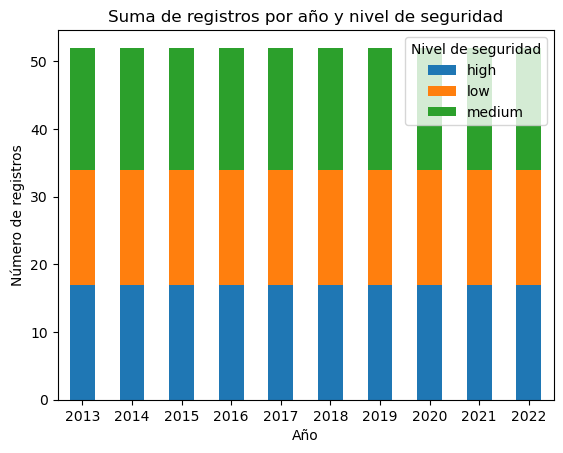

In [18]:
# Agrupar por año y nivel de seguridad
safety_counts = df_final_region.groupby(['year', 'safety_level']).size().unstack(fill_value=0)

# Graficar
safety_counts.plot(kind='bar', stacked=True)
plt.title('Suma de registros por año y nivel de seguridad')
plt.xlabel('Año')
plt.ylabel('Número de registros')
plt.xticks(rotation=0)
plt.legend(title='Nivel de seguridad')
plt.show()


Tipo de dato de 'total injuried': int64

Cantidad de valores nulos en 'total injured': 0


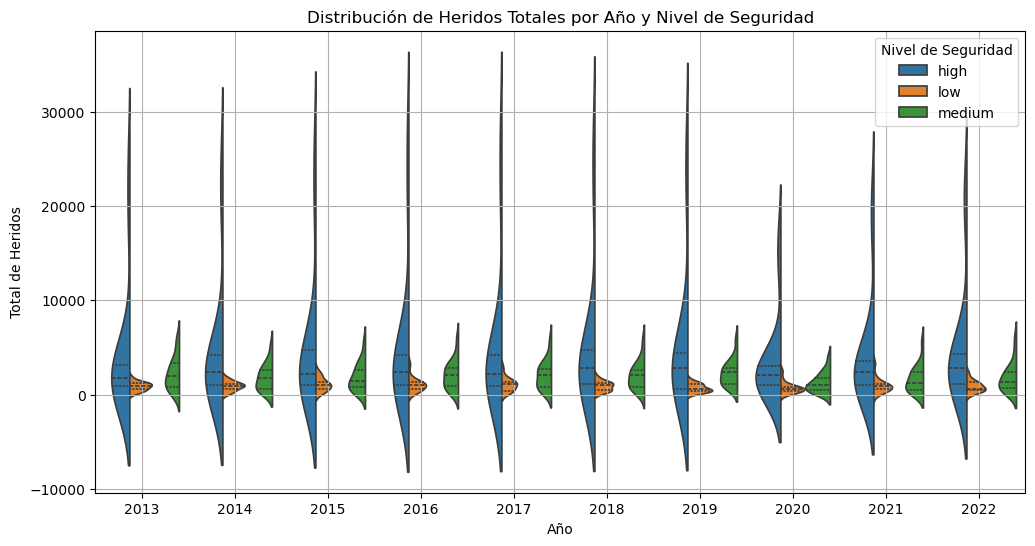

In [23]:
# Verifica el tipo de dato de total_injured
if 'total injuried' in df_final_region.columns:
    print("\nTipo de dato de 'total injuried':", df_final_region['total injuried'].dtype)

    # Asegúrate de que total_injured sea numérico
    df_final_region['total injuried'] = pd.to_numeric(df_final_region['total injuried'], errors='coerce')

    # Verifica la cantidad de valores nulos en total_injured
    print("\nCantidad de valores nulos en 'total injured':", df_final_region['total injuried'].isnull().sum())

    # Crear el gráfico de violín
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='year', y='total injuried', hue='safety_level', data=df_final_region, split=True, inner="quartile")

    # Añadir títulos y etiquetas
    plt.title('Distribución de Heridos Totales por Año y Nivel de Seguridad')
    plt.xlabel('Año')
    plt.ylabel('Total de Heridos')
    plt.legend(title='Nivel de Seguridad')
    plt.grid()

    # Mostrar el gráfico
    plt.show()
else:
    print("La columna 'total_injured' no existe en el DataFrame.")

               year           region province    population  acc with victims  \
count    520.000000              520      520  5.200000e+02        520.000000   
unique          NaN               19       52           NaN               NaN   
top             NaN  Castilla y León    Álava           NaN               NaN   
freq            NaN               90       10           NaN               NaN   
mean    2017.500000              NaN      NaN  5.562010e+05       1827.992308   
std        2.875047              NaN      NaN  7.260639e+05       3228.557813   
min     2013.000000              NaN      NaN  5.112700e+04         93.000000   
25%     2015.000000              NaN      NaN  1.900802e+05        462.500000   
50%     2017.500000              NaN      NaN  3.806630e+05        849.000000   
75%     2020.000000              NaN      NaN  6.553360e+05       1883.250000   
max     2022.000000              NaN      NaN  4.215657e+06      20986.000000   

        total injuried     

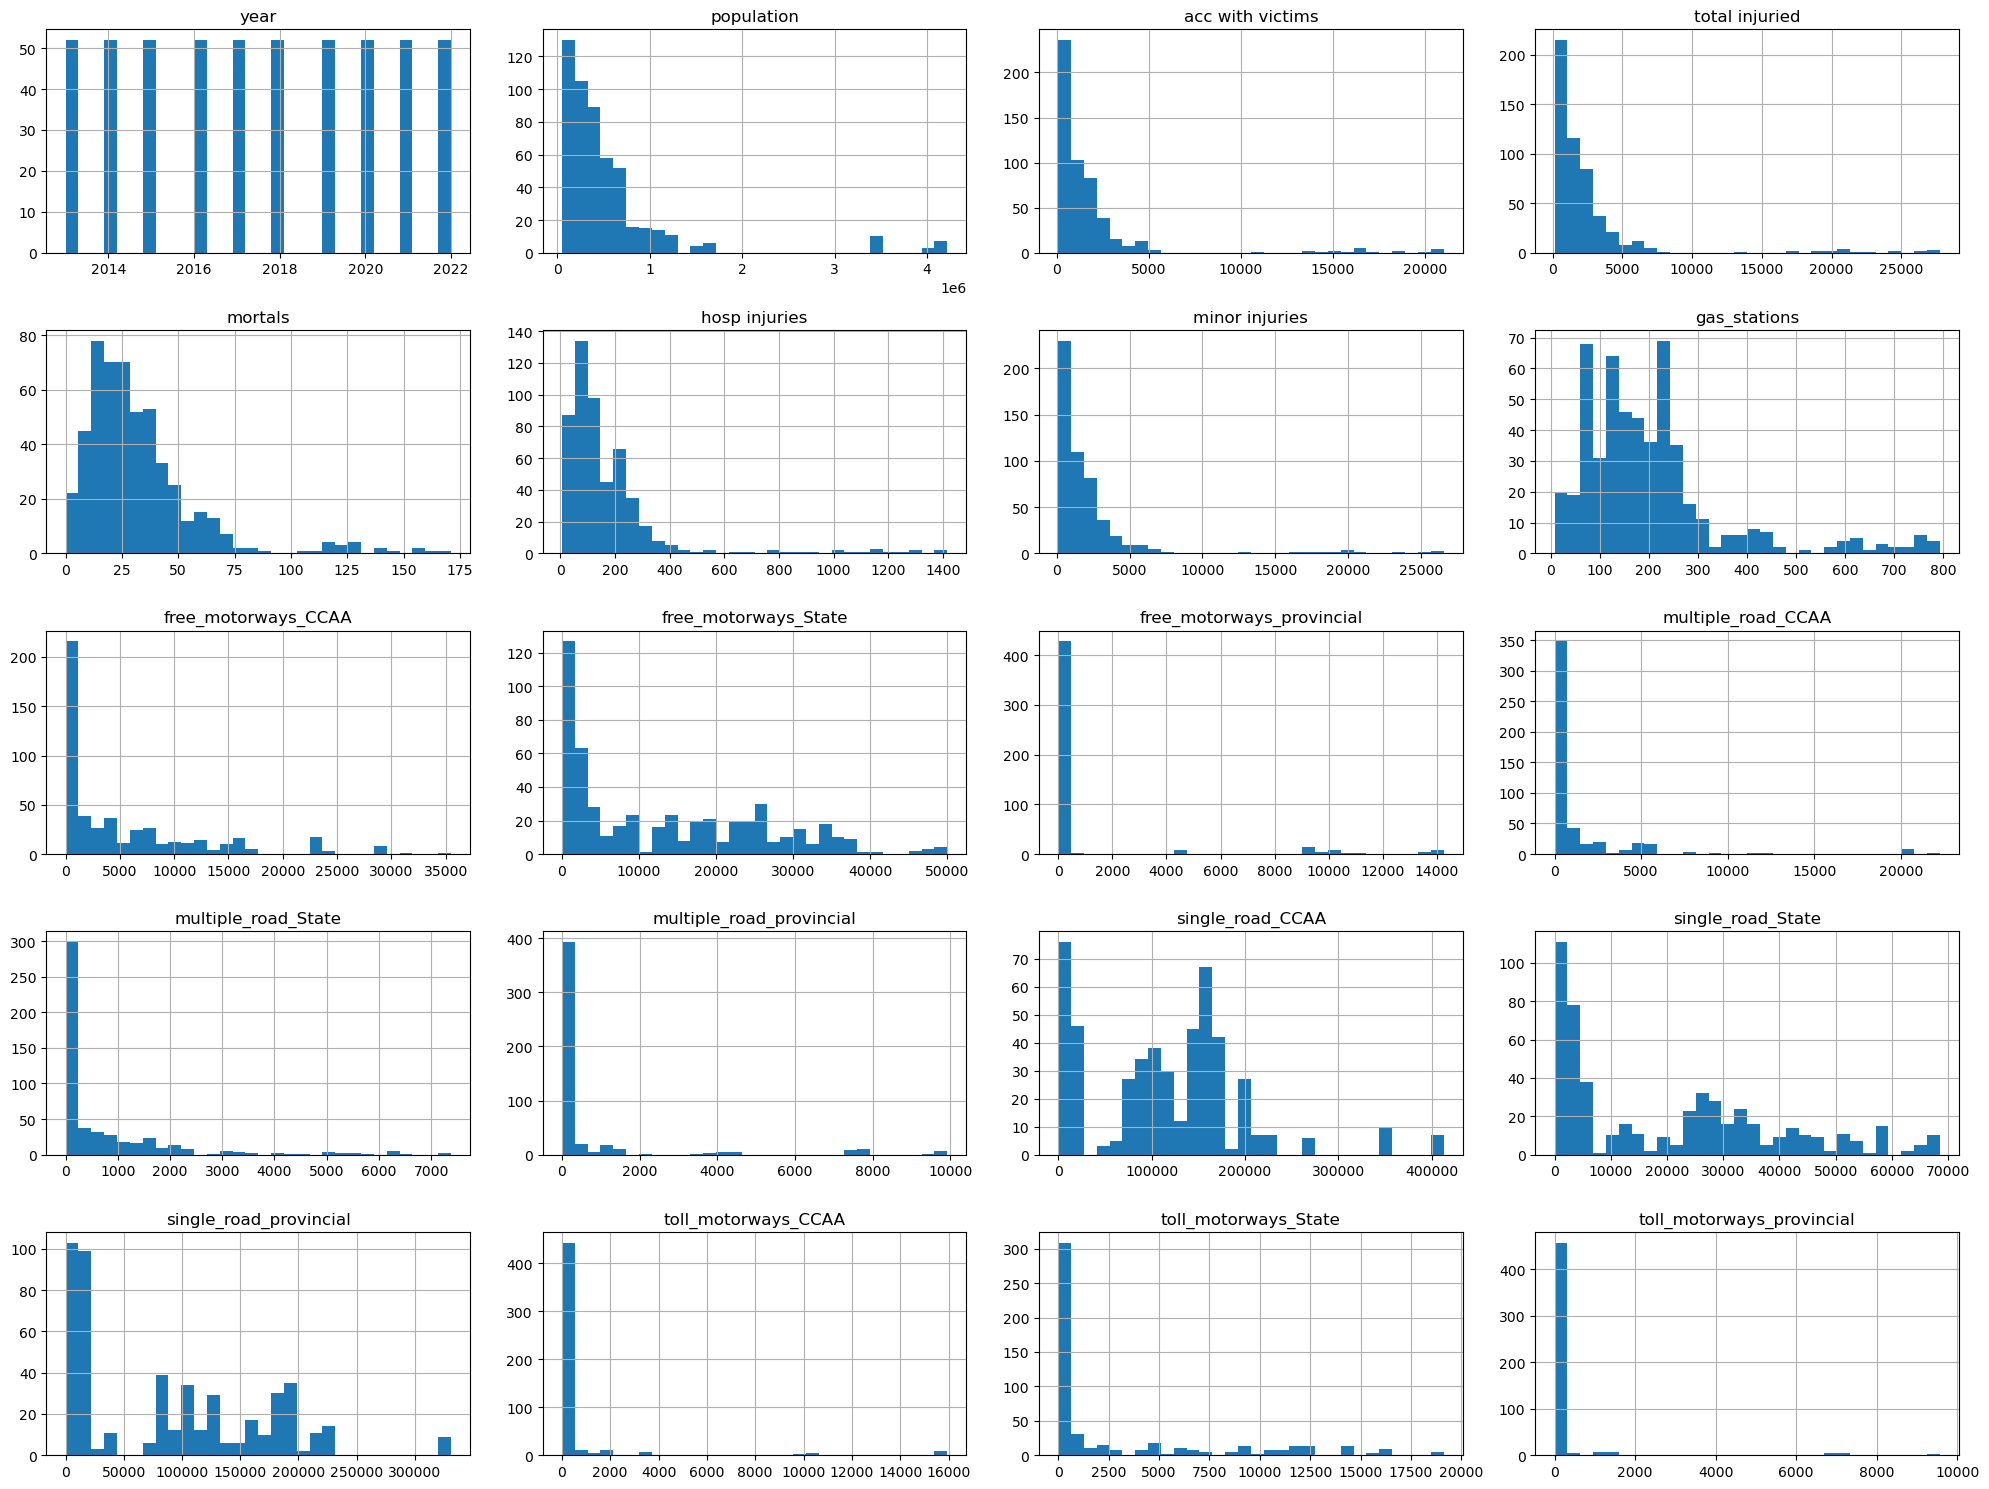

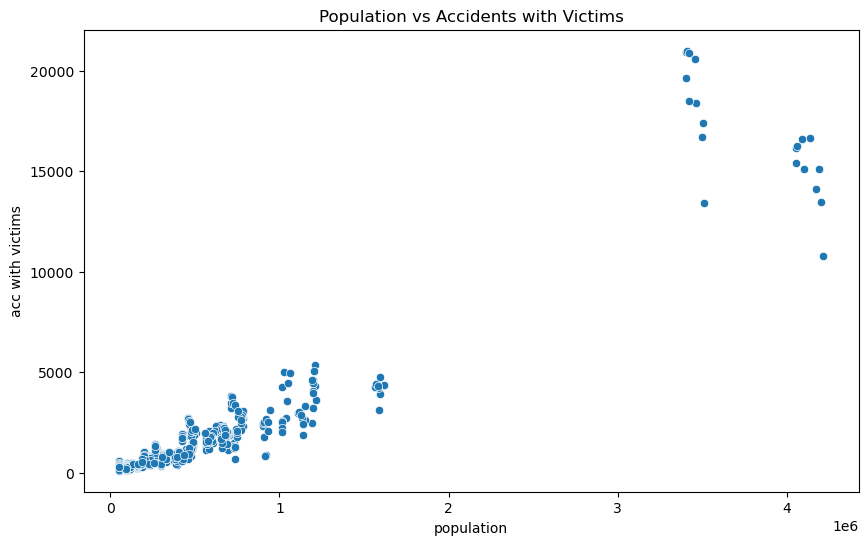

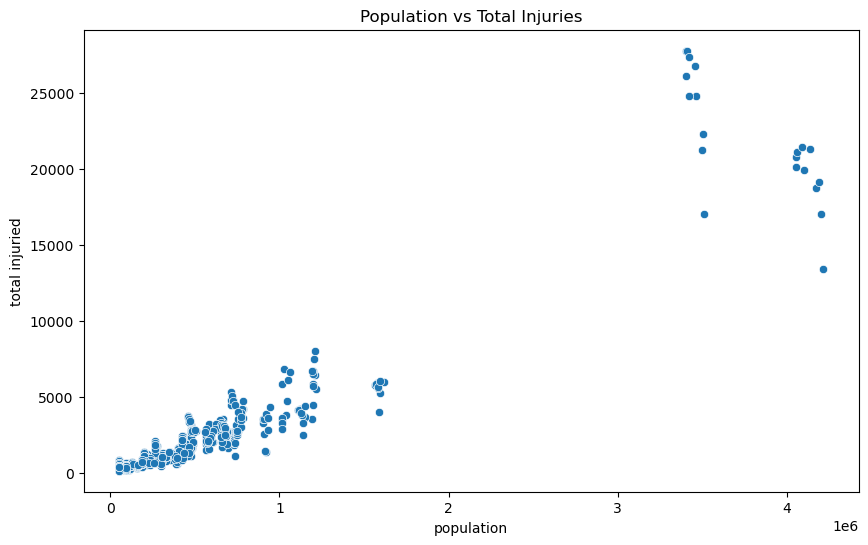

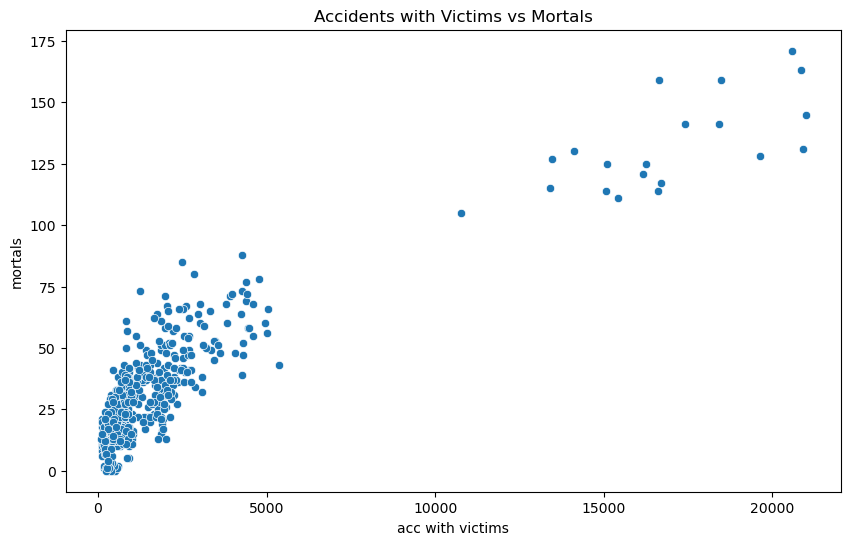

In [24]:
# Descripción estadística de las variables
print(df_final.describe(include='all'))

# Análisis de valores nulos
print(df_final.isnull().sum())

# Distribución de las variables numéricas
df_final.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

# Gráficos de dispersión para algunas variables de interés
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='population', y='acc with victims')
plt.title('Population vs Accidents with Victims')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='population', y='total injuried')
plt.title('Population vs Total Injuries')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='acc with victims', y='mortals')
plt.title('Accidents with Victims vs Mortals')
plt.show()

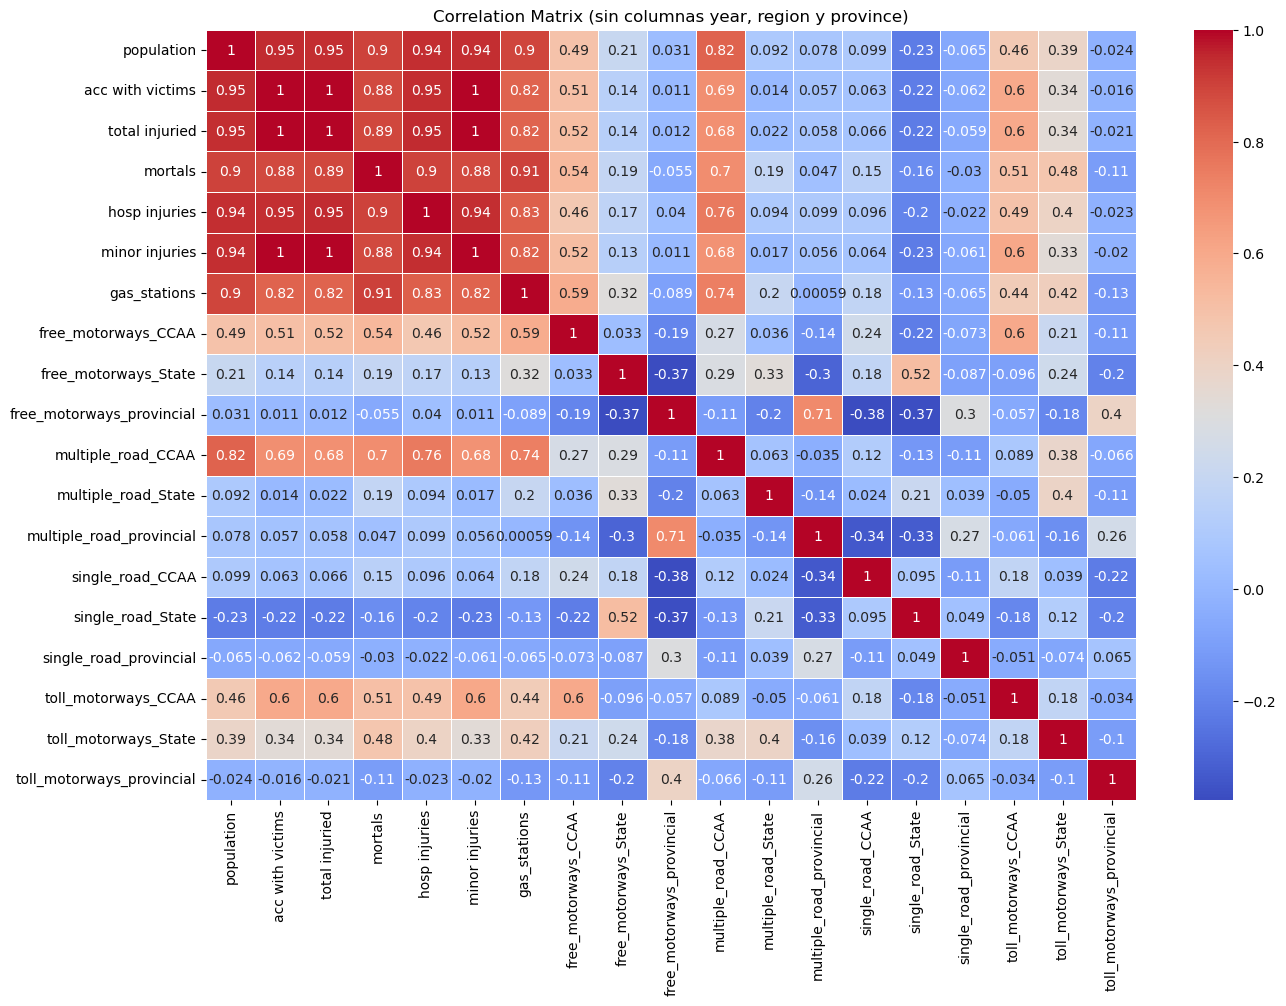

In [25]:
# Eliminar las columnas 'year', 'region' y 'province'
df_filtered = df_final.drop(columns=['year', 'region', 'province'])

# Calcular la matriz de correlación
correlation_matrix_filtered = df_filtered.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (sin columnas year, region y province)')
plt.show()

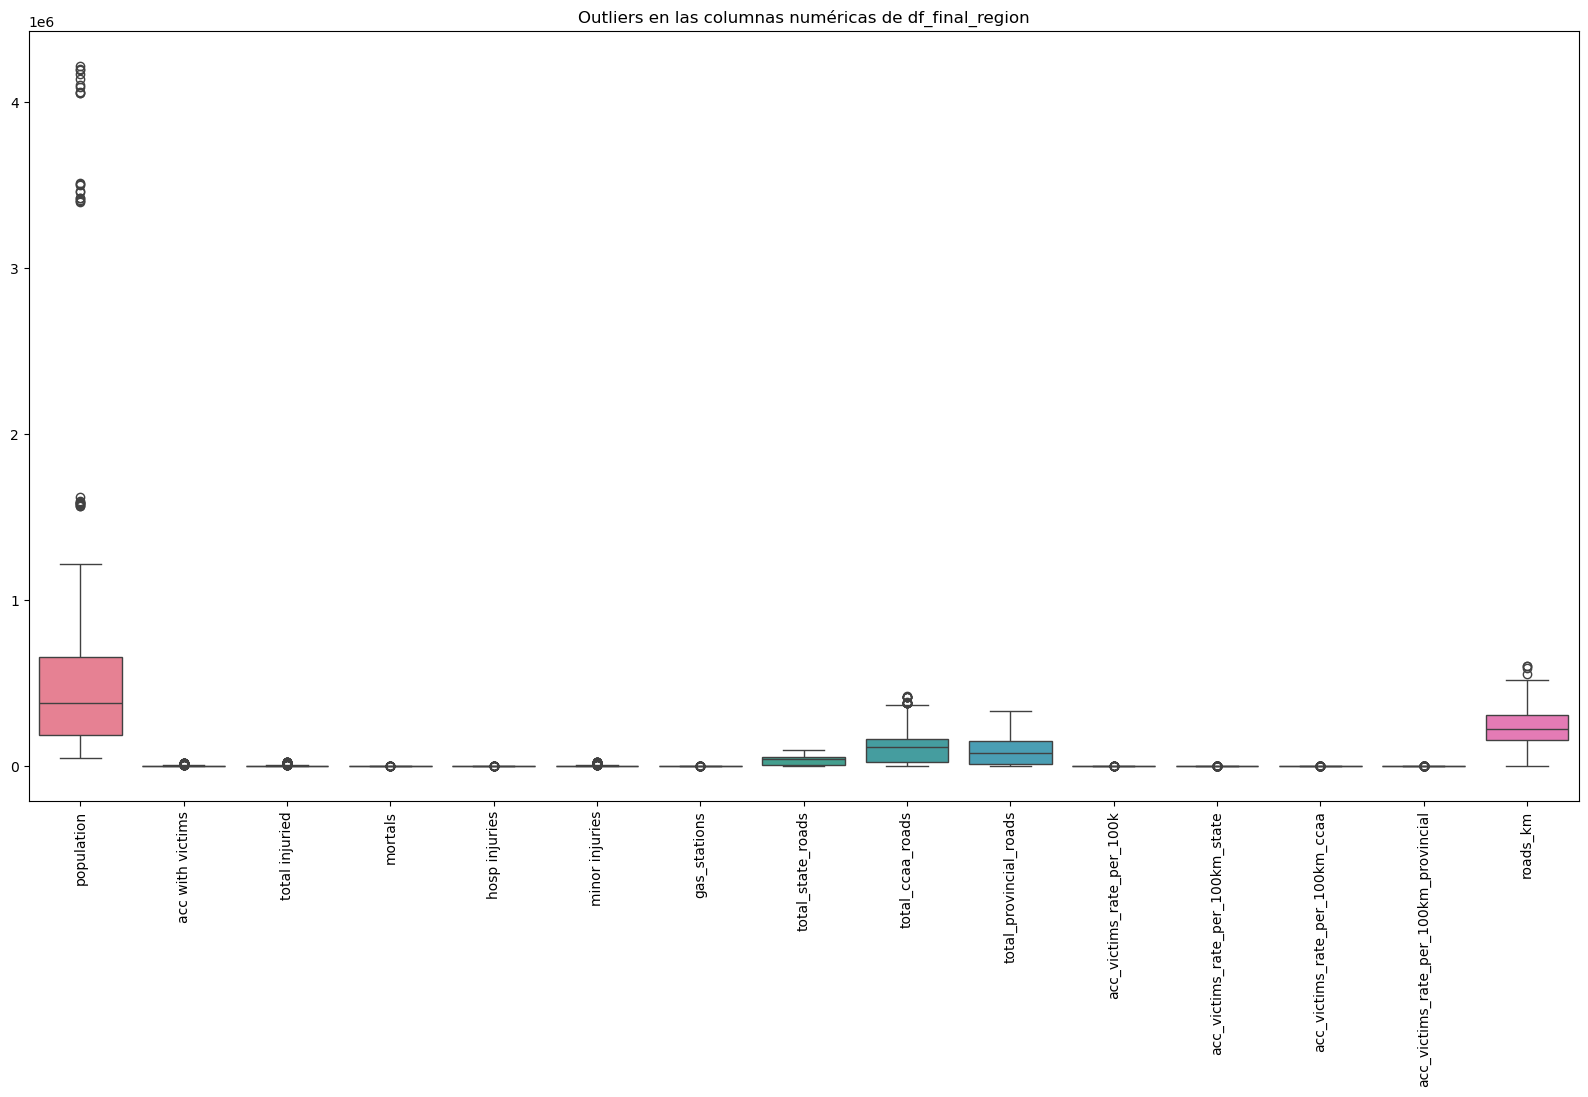

In [28]:
# Seleccionar solo las columnas numéricas excepto 'year', 'region' y 'province'
numeric_cols = df_final_region.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['year']]

# Graficar los outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_final_region[numeric_cols])
plt.xticks(rotation=90)
plt.title('Outliers en las columnas numéricas de df_final_region')
plt.show()

In [29]:
# Descargar los datos geográficos de España
url = 'https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/spain-communities.geojson'
spain = gpd.read_file(url)

In [30]:
spain = spain.drop(columns=['noml_ccaa'])
print(spain.head())

  cod_ccaa           name  cartodb_id                created_at  \
0       07  Castilla-Leon           7 2014-09-30 00:00:00+00:00   
1       09       Cataluña           8 2014-09-30 00:00:00+00:00   
2       18          Ceuta           9 2014-09-30 00:00:00+00:00   
3       14         Murcia          15 2014-09-30 00:00:00+00:00   
4       17       La Rioja          12 2014-09-30 00:00:00+00:00   

                 updated_at                                           geometry  
0 2014-12-25 02:07:41+00:00  MULTIPOLYGON (((-4.89358 43.23848, -4.83920 43...  
1 2014-12-25 02:07:41+00:00  MULTIPOLYGON (((0.71604 42.85832, 0.85552 42.8...  
2 2014-12-25 02:07:41+00:00  MULTIPOLYGON (((-5.34497 35.87106, -5.37291 35...  
3 2014-12-25 02:07:41+00:00  MULTIPOLYGON (((-1.14985 38.74607, -1.11967 38...  
4 2014-12-25 02:07:41+00:00  MULTIPOLYGON (((-2.99723 42.64214, -2.94645 42...  


In [31]:
# Crear un diccionario de mapeo para los nombres de las regiones
mapping = {
    'Andalucia': 'Andalucía',
    'Aragon': 'Aragón',
    'Asturias': 'Asturias',
    'Cantabria': 'Cantabria',
    'Castilla-Leon': 'Castilla y León',
    'Castilla-La Mancha': 'Castilla-La Mancha',
    'Cataluña': 'Cataluña',
    'Ceuta': 'Ceuta',
    'Extremadura': 'Extremadura',
    'Galicia': 'Galicia',
    'Baleares': 'Islas Baleares',
    'Canarias': 'Canarias',
    'Madrid': 'Madrid',
    'Melilla': 'Melilla',
    'Murcia': 'Murcia',
    'Navarra': 'Navarra',
    'Pais Vasco': 'País Vasco',
    'Rioja': 'La Rioja',
    'Valencia': 'C. Valenciana'
}

# Reemplazar los valores en la columna 'name' del dataframe 'spain'
spain['name'] = spain['name'].replace(mapping)

print(spain[['name']])

                  name
0      Castilla y León
1             Cataluña
2                Ceuta
3               Murcia
4             La Rioja
5       Islas Baleares
6             Canarias
7            Cantabria
8            Andalucía
9             Asturias
10       C. Valenciana
11             Melilla
12             Navarra
13             Galicia
14              Aragón
15              Madrid
16         Extremadura
17  Castilla-La Mancha
18          País Vasco


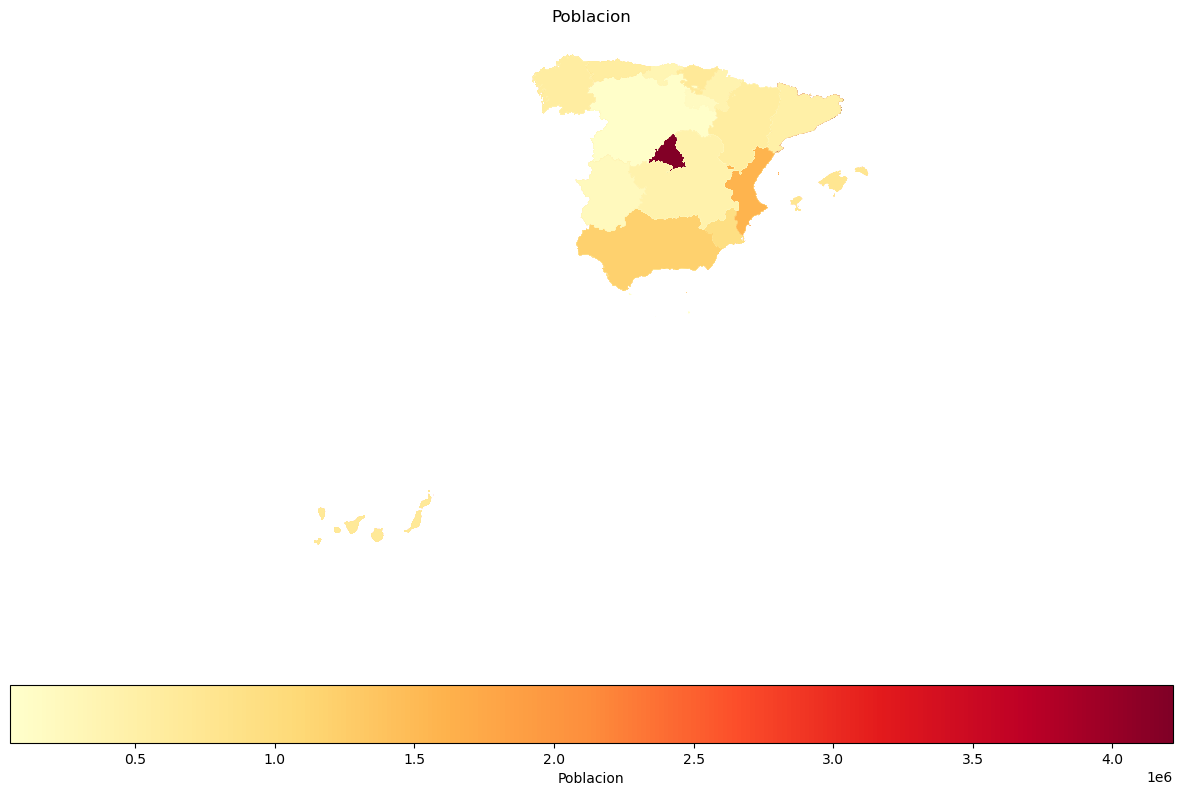

In [32]:
# Merge the geographical data with the accident rate data
spain_merged = spain.merge(df_final, left_on='name', right_on='region')

# Create the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

spain_merged.plot(
    column='population',
    ax=ax,
    legend=True,
    legend_kwds={'label': 'Poblacion', 'orientation': 'horizontal'},
    cmap='YlOrRd',
    missing_kwds={'color': 'lightgrey'}
)

ax.axis('off')
plt.title('Poblacion')
plt.show()

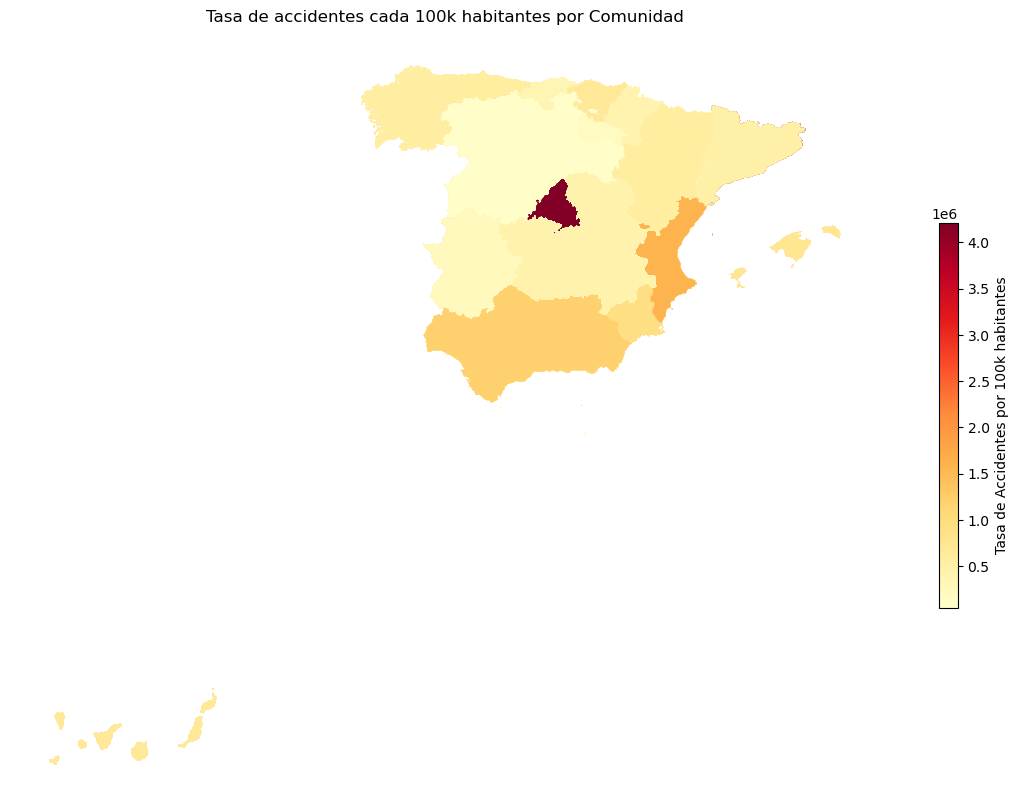

In [33]:
# Crear el mapa cloropético con la barra indicadora de color en un lateral y más pequeña
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

spain_merged.plot(
    column='population',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': 'Tasa de Accidentes por 100k habitantes',
        'orientation': 'vertical',
        'shrink': 0.5
    },
    cmap='YlOrRd',
    missing_kwds={'color': 'lightgrey'}
)

ax.axis('off')
plt.title('Tasa de accidentes cada 100k habitantes por Comunidad')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Preparar los datos
features = df_final_region[['year', 'population', 'total injuried', 'mortals', 'hosp injuries', 'minor injuries', 'gas_stations', 'total_state_roads', 'total_ccaa_roads', 'total_provincial_roads']]
target = df_final_region['acc with victims']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Seleccionar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Hacer predicciones para los próximos 10 años
future_years = pd.DataFrame({
    'year': range(2023, 2033),
    'population': [df_final_region['population'].mean()] * 10,
    'total injuried': [df_final_region['total injuried'].mean()] * 10,
    'mortals': [df_final_region['mortals'].mean()] * 10,
    'hosp injuries': [df_final_region['hosp injuries'].mean()] * 10,
    'minor injuries': [df_final_region['minor injuries'].mean()] * 10,
    'gas_stations': [df_final_region['gas_stations'].mean()] * 10,
    'total_state_roads': [df_final_region['total_state_roads'].mean()] * 10,
    'total_ccaa_roads': [df_final_region['total_ccaa_roads'].mean()] * 10,
    'total_provincial_roads': [df_final_region['total_provincial_roads'].mean()] * 10
})

future_predictions = model.predict(future_years)
print(f'Predicciones de accidentes con víctimas para los próximos 10 años: {future_predictions}')

# Guardar el modelo entrenado
joblib.dump(model, 'accidents_model.pkl')

Mean Squared Error: 34258.025060576925
Predicciones de accidentes con víctimas para los próximos 10 años: [1843.25 1843.25 1843.25 1843.25 1843.25 1843.25 1843.25 1843.25 1843.25
 1843.25]


['accidents_model.pkl']

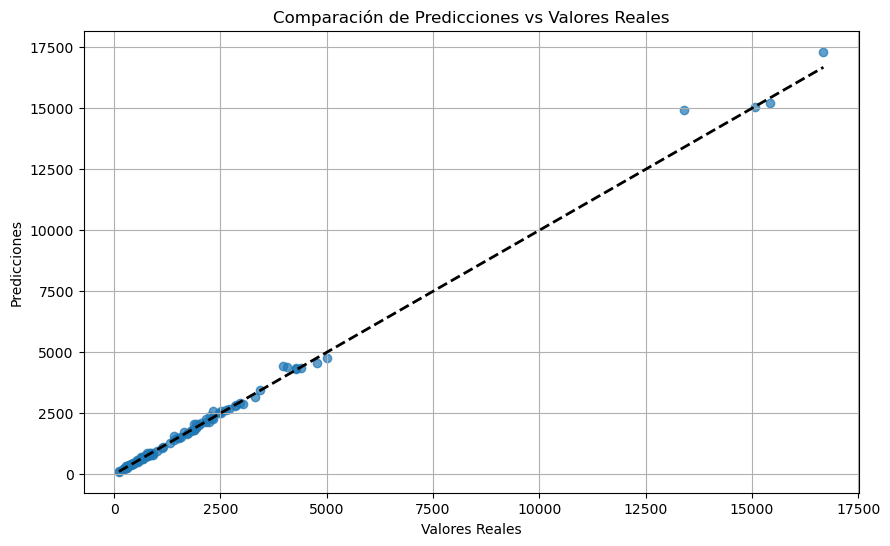

In [35]:
# Crear un gráfico de dispersión para comparar las predicciones con los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.grid(True)
plt.show()

In [36]:
df_final_region

,year,region,population,acc with victims,total injuried,mortals,hosp injuries,minor injuries,gas_stations,total_state_roads,total_ccaa_roads,total_provincial_roads,acc_victims_rate_per_100k,acc_victims_rate_per_100km_state,acc_victims_rate_per_100km_ccaa,acc_victims_rate_per_100km_provincial,roads_km,safety_level
0,2013,País Vasco,202969,906,1216,17,86,1113,56,6089,0.0,140244.0,446.373584,14.879291,inf,0.646017,146333.0,high
1,2013,Castilla-La Mancha,246555,481,680,19,87,574,144,7013,159685.0,140879.0,195.088317,6.858691,0.301218,0.341428,307577.0,low
2,2013,C. Valenciana,1194721,2465,3530,42,341,3147,344,45683,11202.0,101246.0,206.324322,5.395880,22.004999,2.434664,158131.0,medium
3,2013,Andalucía,448850,788,1321,30,121,1170,162,18972,81765.0,117288.0,175.559764,4.153489,0.963738,0.671850,218025.0,low
4,2013,Castilla y León,99333,378,558,19,71,468,55,44034,98874.0,10650.0,380.538190,0.858428,0.382305,3.549296,153558.0,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,2022,País Vasco,680078,1883,2456,21,150,2285,127,0,0.0,125333.0,276.880005,inf,inf,1.502398,125333.0,medium
516,2022,Castilla y León,92999,202,290,21,46,223,84,77350,113691.0,15710.0,217.206637,0.261151,0.177675,1.285805,206751.0,low
517,2022,Aragón,576511,1589,2065,45,210,1810,249,96570,205805.0,101990.0,275.623535,1.645439,0.772090,1.557996,404365.0,medium
518,2022,Ceuta,51147,257,366,1,10,355,9,1623,2102.0,0.0,502.473263,15.834874,12.226451,inf,3725.0,high


In [39]:
# Preparar los datos
features = df_final_region[['year', 'population', 'total injuried', 'mortals', 'hosp injuries', 'minor injuries', 'gas_stations', 'total_state_roads', 'total_ccaa_roads', 'total_provincial_roads']]
target = df_final_region['acc_victims_rate_per_100k']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Seleccionar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Hacer predicciones para los próximos 10 años
future_years = pd.DataFrame({
    'year': range(2023, 2033),
    'population': [df_final_region['population'].mean()] * 10,
    'total injuried': [df_final_region['total injuried'].mean()] * 10,
    'mortals': [df_final_region['mortals'].mean()] * 10,
    'hosp injuries': [df_final_region['hosp injuries'].mean()] * 10,
    'minor injuries': [df_final_region['minor injuries'].mean()] * 10,
    'gas_stations': [df_final_region['gas_stations'].mean()] * 10,
    'total_state_roads': [df_final_region['total_state_roads'].mean()] * 10,
    'total_ccaa_roads': [df_final_region['total_ccaa_roads'].mean()] * 10,
    'total_provincial_roads': [df_final_region['total_provincial_roads'].mean()] * 10
})

future_predictions = model.predict(future_years)
print(f'Predicciones de tasa de accidentes con víctimas por cada 100k habitantes para los próximos 10 años: {future_predictions}')

# Guardar el modelo entrenado
joblib.dump(model, 'acc_victims_rate_model.pkl')

Mean Squared Error: 1076.9524813395294
Predicciones de tasa de accidentes con víctimas por cada 100k habitantes para los próximos 10 años: [309.95244684 309.95244684 309.95244684 309.95244684 309.95244684
 309.95244684 309.95244684 309.95244684 309.95244684 309.95244684]


['acc_victims_rate_model.pkl']

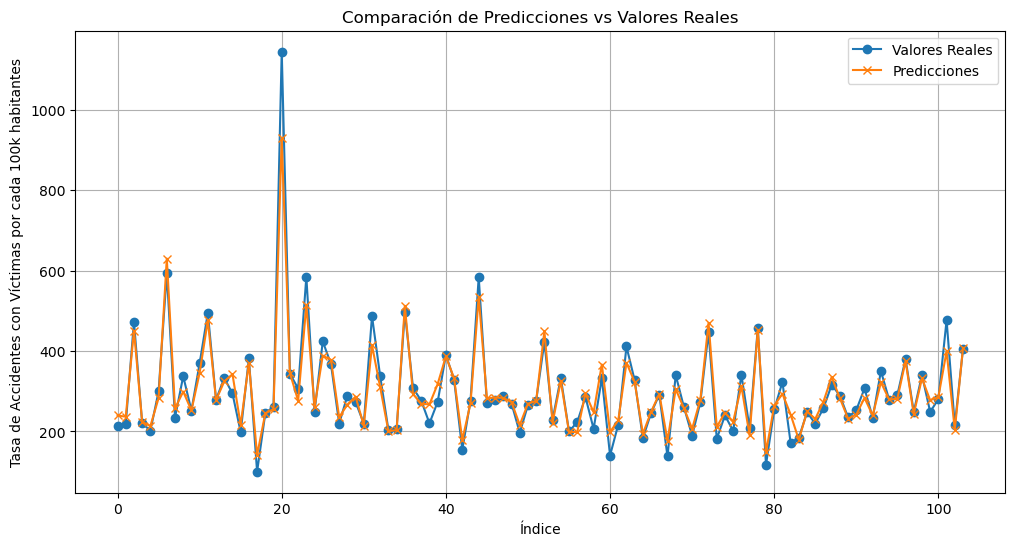

In [40]:
# Crear un gráfico de líneas para comparar las predicciones con los valores reales
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Valores Reales', marker='o')
plt.plot(y_pred, label='Predicciones', marker='x')
plt.xlabel('Índice')
plt.ylabel('Tasa de Accidentes con Víctimas por cada 100k habitantes')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Preparar los datos
features = df_final_region[['year', 'population', 'acc with victims', 'mortals', 'hosp injuries', 'minor injuries', 'gas_stations', 'total_state_roads', 'total_ccaa_roads', 'total_provincial_roads']]
target = df_final_region['total injuried']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Seleccionar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Hacer predicciones para los próximos 10 años
future_years = pd.DataFrame({
    'year': range(2023, 2033),
    'population': [df_final_region['population'].mean()] * 10,
    'acc with victims': [df_final_region['acc with victims'].mean()] * 10,
    'mortals': [df_final_region['mortals'].mean()] * 10,
    'hosp injuries': [df_final_region['hosp injuries'].mean()] * 10,
    'minor injuries': [df_final_region['minor injuries'].mean()] * 10,
    'gas_stations': [df_final_region['gas_stations'].mean()] * 10,
    'total_state_roads': [df_final_region['total_state_roads'].mean()] * 10,
    'total_ccaa_roads': [df_final_region['total_ccaa_roads'].mean()] * 10,
    'total_provincial_roads': [df_final_region['total_provincial_roads'].mean()] * 10
})

future_predictions = model.predict(future_years)
print(f'Predicciones de heridos totales para los próximos 10 años: {future_predictions}')

# Guardar el modelo entrenado
joblib.dump(model, 'total_injuried_model.pkl')

Mean Squared Error: 107368.6543346153
Predicciones de heridos totales para los próximos 10 años: [2507.44 2507.44 2507.44 2507.44 2507.44 2507.44 2507.44 2507.44 2507.44
 2507.44]


['total_injuried_model.pkl']

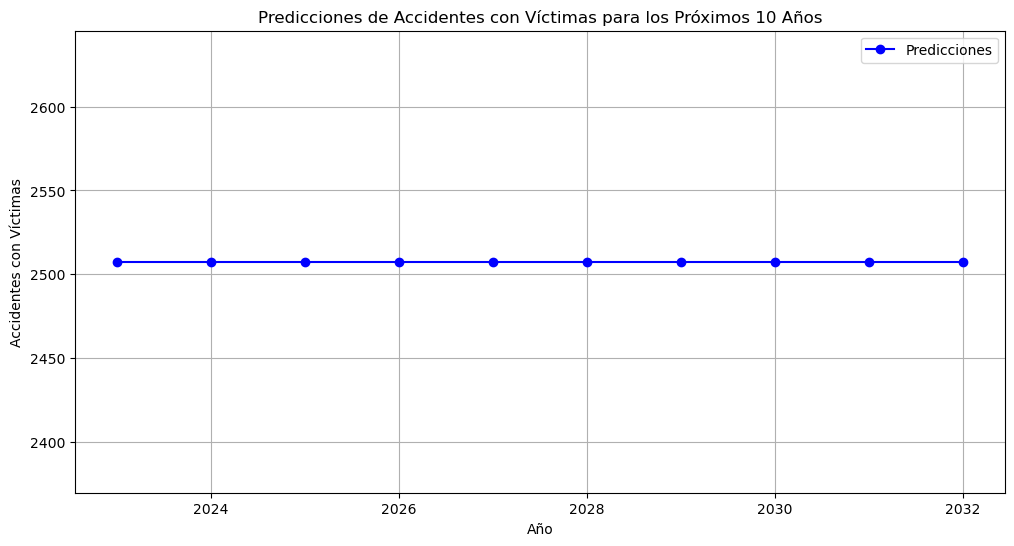

In [42]:
# Crear un gráfico de líneas para las predicciones futuras
plt.figure(figsize=(12, 6))
plt.plot(future_years['year'], future_predictions, marker='o', linestyle='-', color='b', label='Predicciones')
plt.xlabel('Año')
plt.ylabel('Accidentes con Víctimas')
plt.title('Predicciones de Accidentes con Víctimas para los Próximos 10 Años')
plt.legend()
plt.grid(True)
plt.show()

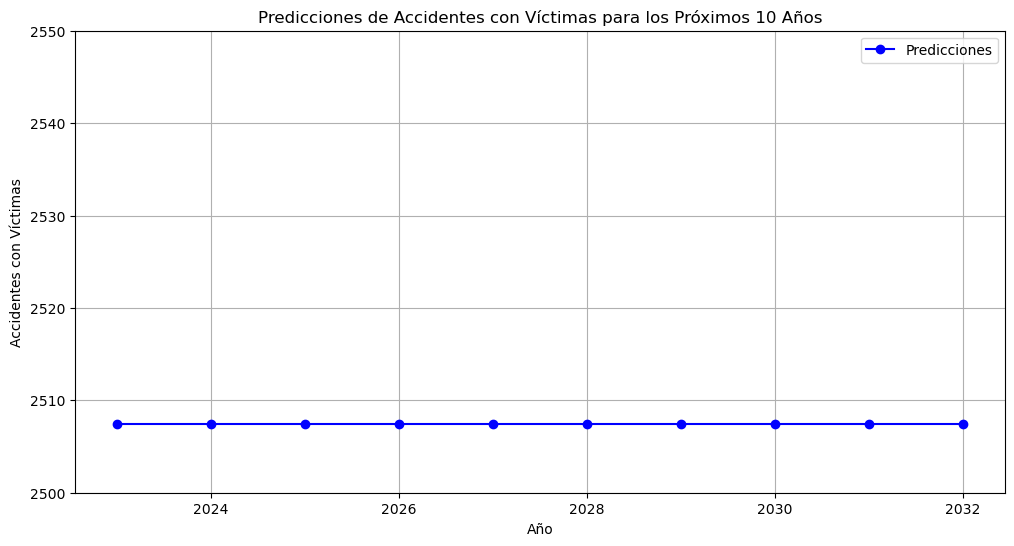

In [43]:
# Crear un gráfico de líneas para las predicciones futuras con la escala del eje y ajustada
plt.figure(figsize=(12, 6))
plt.plot(future_years['year'], future_predictions, marker='o', linestyle='-', color='b', label='Predicciones')
plt.xlabel('Año')
plt.ylabel('Accidentes con Víctimas')
plt.title('Predicciones de Accidentes con Víctimas para los Próximos 10 Años')
plt.ylim(2500, 2550)  # Ajustar la escala del eje y
plt.legend()
plt.grid(True)
plt.show()

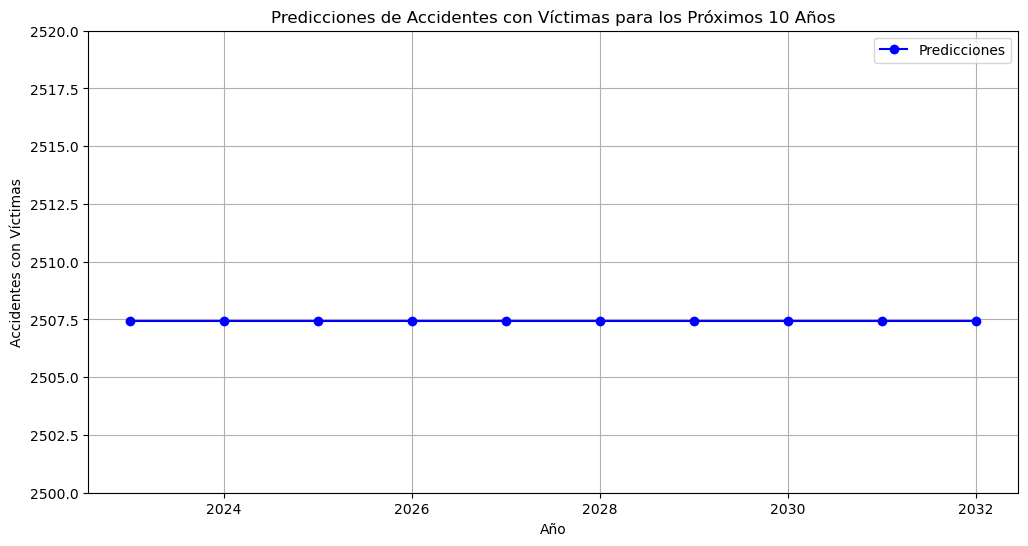

In [44]:
# Crear un gráfico de líneas para las predicciones futuras con la escala del eje y ajustada
plt.figure(figsize=(12, 6))
plt.plot(future_years['year'], future_predictions, marker='o', linestyle='-', color='b', label='Predicciones')
plt.xlabel('Año')
plt.ylabel('Accidentes con Víctimas')
plt.title('Predicciones de Accidentes con Víctimas para los Próximos 10 Años')
plt.ylim(2500, 2520)  # Ajustar la escala del eje y
plt.legend()
plt.grid(True)
plt.show()

2024-10-25 09:14:13.473 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 09:14:14.871 
  command:

    streamlit run c:\Users\Carlos\anaconda3\envs\Statistics_Lab\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-10-25 09:14:14.879 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 09:14:15.044 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 09:14:15.045 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 09:14:15.073 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 09:14:15.076 Session state does not function when running a script without `streamlit run`
2024-10-25 09:14:15.106 Thread 'MainThread': missi

DeltaGenerator()

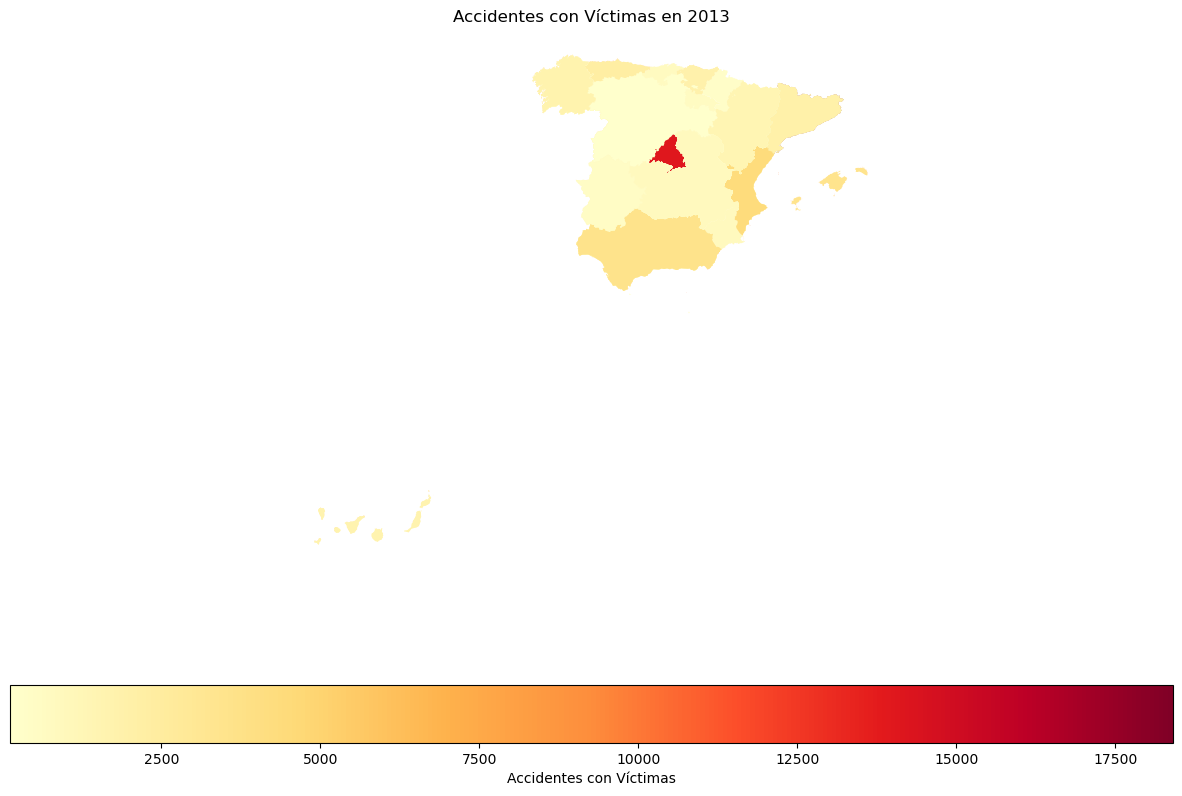

In [45]:
import streamlit as st
import geopandas as gpd

import matplotlib.pyplot as plt

# Crear una función para generar el mapa coroplético
def plot_choropleth(year):
    # Filtrar los datos para el año seleccionado
    df_year = df_final[df_final['year'] == year]
    
    # Merge the geographical data with the accident rate data for the selected year
    spain_merged_year = spain.merge(df_year, left_on='name', right_on='region')
    
    # Create the choropleth map
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    
    spain_merged_year.plot(
        column='acc with victims',
        ax=ax,
        legend=True,
        legend_kwds={'label': 'Accidentes con Víctimas', 'orientation': 'horizontal'},
        cmap='YlOrRd',
        missing_kwds={'color': 'lightgrey'}
    )
    
    ax.axis('off')
    plt.title(f'Accidentes con Víctimas en {year}')
    return fig

# Crear la aplicación de Streamlit
st.title('Mapa Coroplético de Accidentes con Víctimas en España')

# Seleccionar el año
year = st.slider('Selecciona el año', min_value=int(df_final['year'].min()), max_value=int(df_final['year'].max()), step=1)

# Generar y mostrar el mapa
fig = plot_choropleth(year)
st.pyplot(fig)

In [46]:
import streamlit as st

# Crear el gráfico de líneas
def plot_accidents_rate(df):
    fig, ax = plt.subplots(figsize=(10, 6))
    for region in df['region'].unique():
        region_data = df[df['region'] == region]
        ax.plot(region_data['year'], region_data['acc_victims_rate_per_100k'], label=region)
    
    ax.set_title('Tasa de Accidentes con Víctimas por cada 100k habitantes')
    ax.set_xlabel('Año')
    ax.set_ylabel('Tasa de Accidentes con Víctimas')
    ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.grid(True)
    return fig

# Crear la aplicación de Streamlit
st.title('Evolución de la Tasa de Accidentes con Víctimas por cada 100k habitantes')

# Generar y mostrar el gráfico
fig = plot_accidents_rate(df_final_region)
st.pyplot(fig)

2024-10-25 09:27:07.533 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 09:27:07.544 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 09:27:07.946 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 09:27:10.947 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 09:27:10.952 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [47]:
import streamlit as st
import geopandas as gpd
import pandas as pd

import matplotlib.pyplot as plt

# Cargar los datos
df_final = pd.read_csv('df_final.csv', delimiter=',', thousands='.', decimal=',')
url = 'https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/spain-communities.geojson'
spain = gpd.read_file(url)

# Crear un diccionario de mapeo para los nombres de las regiones
mapping = {
    'Andalucia': 'Andalucía',
    'Aragon': 'Aragón',
    'Asturias': 'Asturias',
    'Cantabria': 'Cantabria',
    'Castilla-Leon': 'Castilla y León',
    'Castilla-La Mancha': 'Castilla-La Mancha',
    'Cataluña': 'Cataluña',
    'Ceuta': 'Ceuta',
    'Extremadura': 'Extremadura',
    'Galicia': 'Galicia',
    'Baleares': 'Islas Baleares',
    'Canarias': 'Canarias',
    'Madrid': 'Madrid',
    'Melilla': 'Melilla',
    'Murcia': 'Murcia',
    'Navarra': 'Navarra',
    'Pais Vasco': 'País Vasco',
    'Rioja': 'La Rioja',
    'Valencia': 'C. Valenciana'
}

# Reemplazar los valores en la columna 'name' del dataframe 'spain'
spain['name'] = spain['name'].replace(mapping)

# Crear una función para generar el mapa coroplético
def plot_choropleth(year):
    # Filtrar los datos para el año seleccionado
    df_year = df_final[df_final['year'] == year]
    
    # Merge the geographical data with the accident rate data for the selected year
    spain_merged_year = spain.merge(df_year, left_on='name', right_on='region')
    
    # Create the choropleth map
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    
    spain_merged_year.plot(
        column='acc with victims',
        ax=ax,
        legend=True,
        legend_kwds={'label': 'Accidentes con Víctimas', 'orientation': 'horizontal'},
        cmap='YlOrRd',
        missing_kwds={'color': 'lightgrey'}
    )
    
    ax.axis('off')
    plt.title(f'Accidentes con Víctimas en {year}')
    return fig

# Crear la aplicación de Streamlit
st.title('Mapa Coroplético de Accidentes con Víctimas en España')

# Seleccionar el año
year = st.slider('Selecciona el año', min_value=int(df_final['year'].min()), max_value=int(df_final['year'].max()), step=1)

# Generar y mostrar el mapa
fig = plot_choropleth(year)
st.pyplot(fig)

2024-10-25 09:28:12.109 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 09:28:12.125 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 09:28:12.140 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 09:28:12.141 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 09:28:12.159 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 09:28:12.175 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 09:28:12.179 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 09:28:25.350 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [48]:
df_final2 = pd.read_csv('df_final.csv', delimiter=',', thousands='.', decimal=',')

In [49]:
df_final2['acc_victims_rate_per_100k'] = (df_final2['acc with victims'] / df_final2['population']) * 100000
df_final2

,year,region,province,population,acc with victims,total injuried,mortals,hosp injuries,minor injuries,gas_stations,...,multiple_road_CCAA,multiple_road_State,multiple_road_provincial,single_road_CCAA,single_road_State,single_road_provincial,toll_motorways_CCAA,toll_motorways_State,toll_motorways_provincial,acc_victims_rate_per_100k
0,2013,País Vasco,Álava,202969,906,1216,17,86,1113,56,...,NaN,0,1196.0,NaN,0,128398.0,NaN,6089,1423.0,446.373584
1,2013,Castilla-La Mancha,Albacete,246555,481,680,19,87,574,144,...,0.0,0,0.0,159685.0,4204,140879.0,0.0,0,0.0,195.088317
2,2013,C. Valenciana,Alicante,1194721,2465,3530,42,341,3147,344,...,584.0,6529,1608.0,9069.0,20849,99638.0,0.0,15946,0.0,206.324322
3,2013,Andalucía,Almería,448850,788,1321,30,121,1170,162,...,232.0,112,0.0,71376.0,14006,117288.0,0.0,2819,0.0,175.559764
4,2013,Castilla y León,Ávila,99333,378,558,19,71,468,55,...,201.0,324,0.0,98673.0,34639,10650.0,0.0,374,0.0,380.538190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,2022,País Vasco,Vizcaya,680078,1883,2456,21,150,2285,127,...,NaN,0,3962.0,NaN,0,103687.0,NaN,0,7233.0,276.880005
516,2022,Castilla y León,Zamora,92999,202,290,21,46,223,84,...,0.0,1569,0.0,113691.0,42294,15710.0,0.0,0,0.0,217.206637
517,2022,Aragón,Zaragoza,576511,1589,2065,45,210,1810,249,...,941.0,3611,315.0,204336.0,47143,101675.0,528.0,5491,0.0,275.623535
518,2022,Ceuta,Ceuta,51147,257,366,1,10,355,9,...,0.0,104,NaN,2102.0,1519,NaN,0.0,0,NaN,502.473263


In [50]:
df_final2.to_csv('df_final2.csv', index=False)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Preparar los datos
df_final2['is_safe'] = df_final2['acc_victims_rate_per_100k'] < df_final2['acc_victims_rate_per_100k'].mean()
features = df_final2.drop(columns=['year', 'province', 'region', 'acc_victims_rate_per_100k', 'is_safe'])
target = df_final2['is_safe']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Seleccionar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9134615384615384
              precision    recall  f1-score   support

       False       0.94      0.81      0.87        37
        True       0.90      0.97      0.94        67

    accuracy                           0.91       104
   macro avg       0.92      0.89      0.90       104
weighted avg       0.92      0.91      0.91       104



In [54]:
from sklearn.metrics import classification_report
import pandas as pd

import matplotlib.pyplot as plt

# Obtener el reporte de clasificación
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Seleccionar solo las métricas de interés
metrics = report_df.loc[['accuracy', 'precision', 'recall', 'f1-score']]

# Crear el gráfico de barras
metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Evaluación del Modelo')
plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

KeyError: "['precision', 'recall', 'f1-score'] not in index"

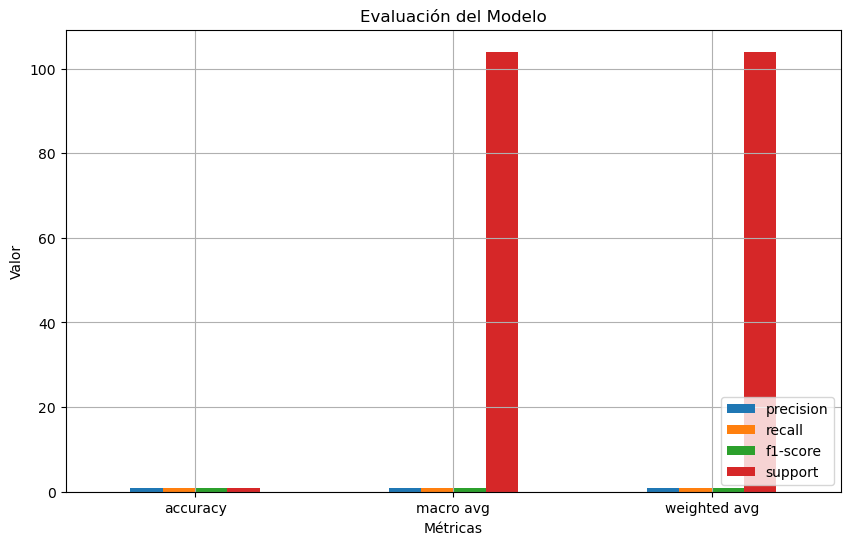

In [55]:
# Seleccionar solo las métricas de interés
metrics = report_df.loc[['accuracy', 'macro avg', 'weighted avg']]

# Crear el gráfico de barras
metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Evaluación del Modelo')
plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

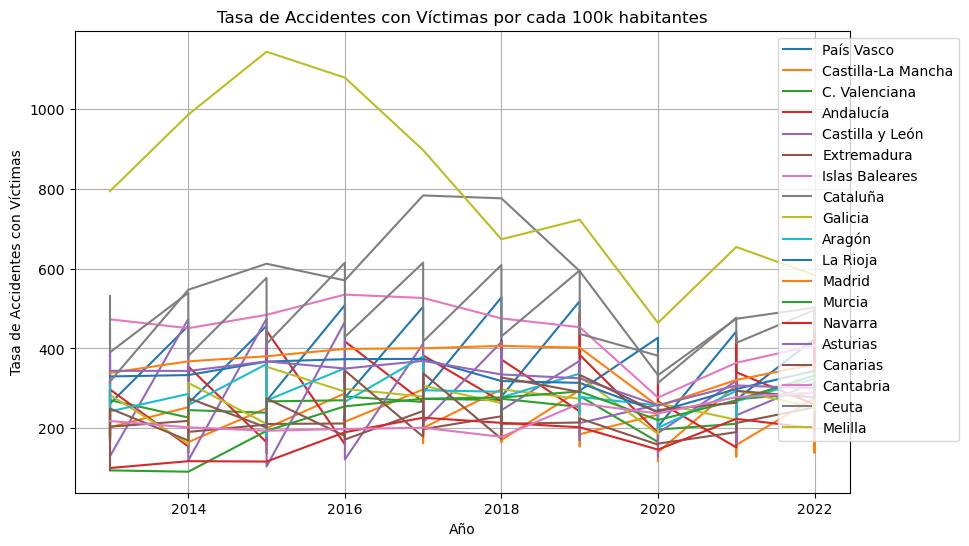

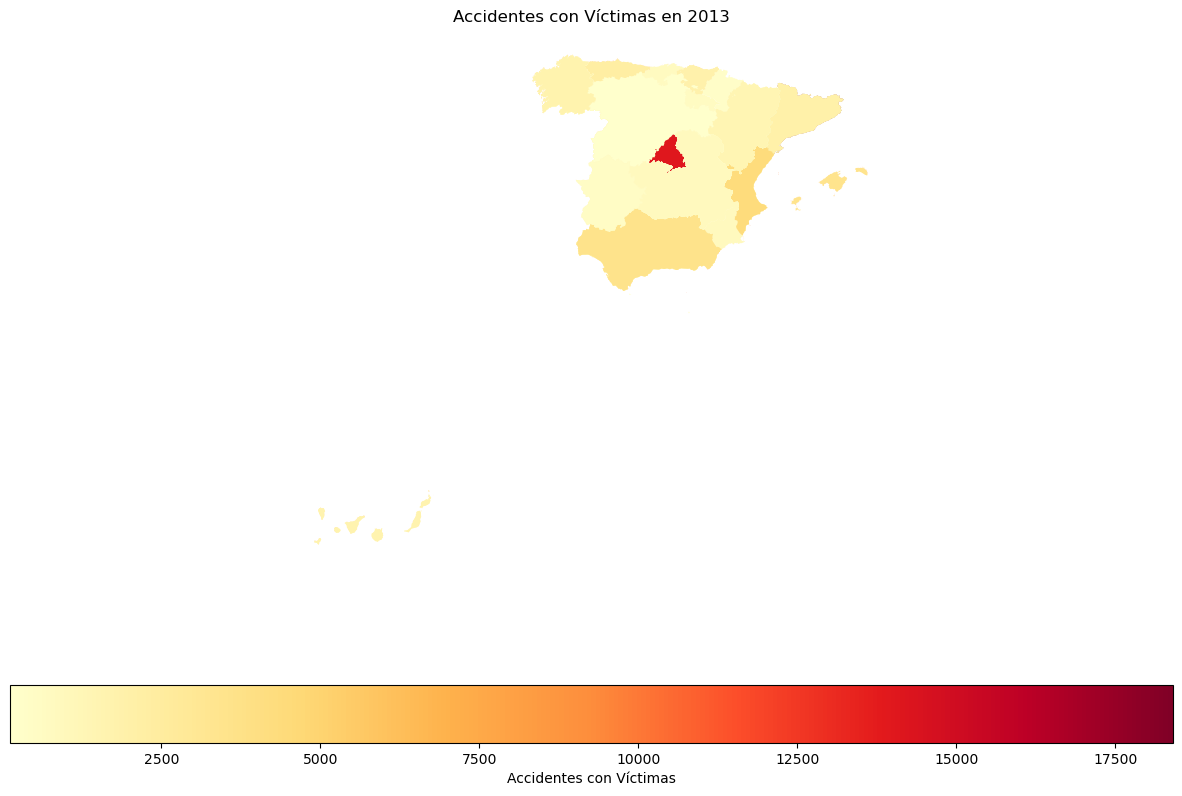

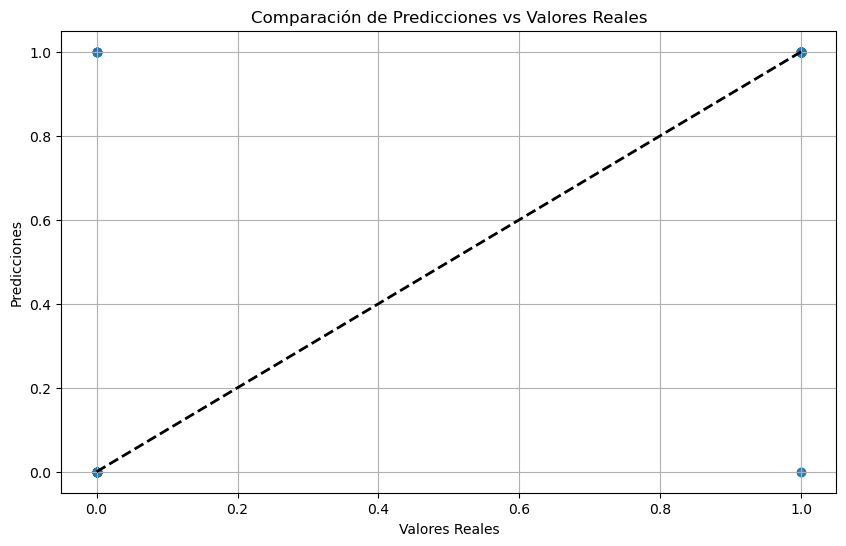

In [53]:
# Crear un gráfico de dispersión para comparar las predicciones con los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.grid(True)
plt.show()